In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('copper_model.csv')
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,log_selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,1,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,6.751101
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,1,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,6.954639
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,1,WI,28.0,0.38,952.0,628377,20210101.0,644.33,6.469762
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,1,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,6.645091
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,1,W,10.0,4.00,2000.0,640665,20210301.0,577.00,6.359574


In [89]:
# x= quantity tons, y=selling_price

X = df.iloc[:,7].values
y=df.iloc[:,-2].values

X = X.reshape(-1,1)

In [90]:
X

array([[10.],
       [41.],
       [28.],
       ...,
       [41.],
       [41.],
       [41.]])

In [91]:
y

array([ 854.  , 1047.  ,  644.33, ...,  619.  ,  601.  ,  607.  ])

### Splitting the data into training set and test set

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25,random_state=0)

In [93]:
y_train

array([ 597.,  652.,  811., ...,  784.,  597., 1095.])

### training the Simple Linear Regression model in training set

In [94]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

#### Predicting the test set results

In [95]:
X_test

array([[10.],
       [10.],
       [10.],
       ...,
       [41.],
       [41.],
       [10.]])

In [96]:
y_pred = regressor.predict(X_test)

y_pred

array([798.10372871, 798.10372871, 798.10372871, ..., 854.98285686,
       854.98285686, 798.10372871])

In [97]:
y_test

array([1067.02,  577.  ,  643.  , ..., 1405.  ,  583.  ,  934.  ])

#### Visualizing the training set results

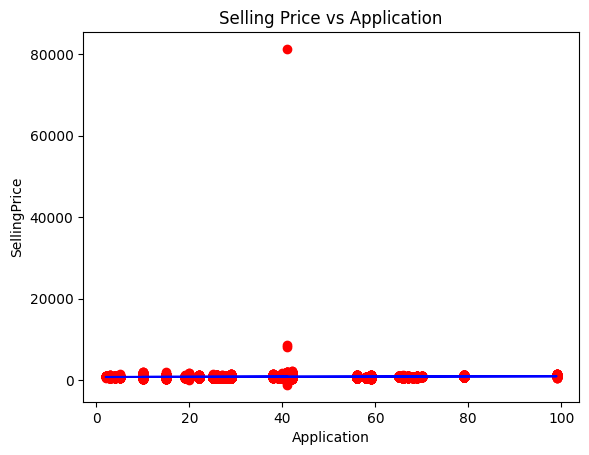

In [99]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train), color='blue')
plt.title('Selling Price vs Application')
plt.xlabel('Application')
plt.ylabel('SellingPrice')
plt.show()